In [1]:
import os
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
source = "/home/yehor/Desktop/bestsellers with categories.csv"
df = pd.read_csv(source)

In [3]:
df.head(5)

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


# Про скільки книг зберігає дані датасет?
## Відповідь: 550

In [4]:
df.shape

(550, 7)

In [5]:
df.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']


# Чи є в якихось змінних пропуски?
## Відповідь: Ні

In [6]:
df_columns = df.columns
for columns in df_columns:
    nan_values = df[columns].isna().sum()
    print(f"{columns}: {nan_values}")

name: 0
author: 0
user_rating: 0
reviews: 0
price: 0
year: 0
genre: 0


# Які є унікальні жанри?
## Відповідь: 'Non Fiction', 'Fiction'

In [7]:
df["genre"].unique()

array(['Non Fiction', 'Fiction'], dtype=object)

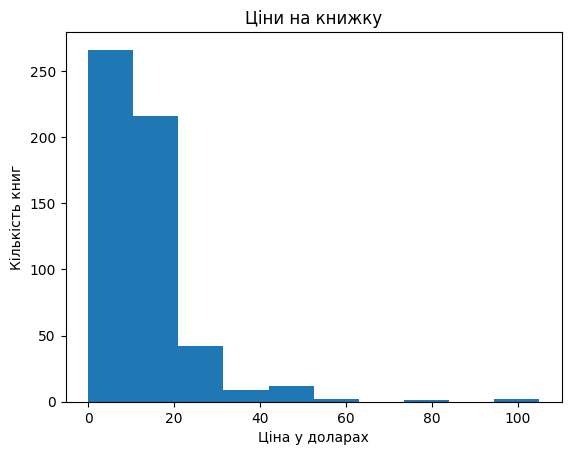

In [8]:
df['price'].plot(kind='hist', bins=10)

plt.title('Ціни на книжку')
plt.xlabel('Ціна у доларах')
plt.ylabel('Кількість книг')

plt.show()

# Максимальна ціна?
## Відповідь: 105

# Мінімальна ціна?
## Відповідь: min

# Середня ціна?
## Відповідь: 13.1

# Медіанна ціна?
## Відповідь: 11

In [9]:
df['price'].describe()

count    550.000000
mean      13.100000
std       10.842262
min        0.000000
25%        7.000000
50%       11.000000
75%       16.000000
max      105.000000
Name: price, dtype: float64

# Який рейтинг у датасеті найвищий? 
## Відповідь: 4.9

In [10]:
sorted_df_rating = df.sort_values(by='user_rating', ascending=False)
max_rating = sorted_df_rating.iloc[0]
max_rating

name           The Magnolia Story
author                Chip Gaines
user_rating                   4.9
reviews                      7861
price                           5
year                         2016
genre                 Non Fiction
Name: 431, dtype: object

# Скільки книг мають такий рейтинг? 
## Відповідь: 52

In [11]:
books_max_rating = df['user_rating'].value_counts()
books_max_rating[4.9]

52

# Яка книга має найбільше відгуків? 
## Відповідь: Where the Crawdads Sing

In [12]:
sorted_df = df.sort_values(by='reviews', ascending=False)
most_reviewed_book = sorted_df.iloc[0]
most_reviewed_book

name           Where the Crawdads Sing
author                     Delia Owens
user_rating                        4.8
reviews                          87841
price                               15
year                              2019
genre                          Fiction
Name: 534, dtype: object

# З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча (можна використати проміжний датафрейм)? 
## Відповідь: Publication Manual of the American Psychologic...

In [13]:
books_2015 = df[df['year'] == 2015]

top50_2015 = books_2015.sort_values(by='user_rating', ascending=False).head(50)

most_expensive_book = top50_2015.sort_values(by='price', ascending=False).iloc[0]

most_expensive_book

name           Publication Manual of the American Psychologic...
author                        American Psychological Association
user_rating                                                  4.5
reviews                                                     8580
price                                                         46
year                                                        2015
genre                                                Non Fiction
Name: 277, dtype: object

# Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році (використовуйте &)? 
## Відповідь: 20

In [14]:
fiction_books_2010 = df[(df['year'] == 2010) & (df['genre'] == 'Fiction')]

number_of_fiction_books = fiction_books_2010.shape[0]
number_of_fiction_books

20

# Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках (використовуйте | або функцію isin)? 
## Відповідь: 1

In [15]:
books_4_9 = df[(df['user_rating'] == 4.9) & ((df['year'] == 2010) | (df['year'] == 2011))]
# books_4_9 = df[(df['User Rating'] == 4.9) & (df['Year'].isin([2010, 2011]))]

number_of_books_4_9 = books_4_9.shape[0]
number_of_books_4_9

1

# І насамкінець, давайте відсортуємо за зростанням ціни всі книги, які потрапили до рейтингу в 2015 році і коштують дешевше за 8 доларів (використовуйте функцію sort_values)

# Яка книга остання у відсортованому списку? 
## Відповідь: To Kill a Mockingbird

In [16]:
books_2015_under_8 = df[(df['year'] == 2015) & (df['price'] < 8)]
sorted_books_2015_under_8 = books_2015_under_8.sort_values(by='price', ascending=False)
sorted_books_2015_under_8

,name,author,user_rating,reviews,price,year,genre
253,Old School (Diary of a Wimpy Kid #10),Jeff Kinney,4.8,6169,7,2015,Fiction
16,Adult Coloring Book: Stress Relieving Animal D...,Blue Star Coloring,4.6,2925,6,2015,Non Fiction
376,The Four Agreements: A Practical Guide to Pers...,Don Miguel Ruiz,4.7,23308,6,2015,Non Fiction
17,Adult Coloring Book: Stress Relieving Patterns,Blue Star Coloring,4.4,2951,6,2015,Non Fiction
224,Love You Forever,Robert Munsch,4.8,18613,5,2015,Fiction
28,Baby Touch and Feel: Animals,DK,4.6,5360,5,2015,Non Fiction
478,The Very Hungry Caterpillar,Eric Carle,4.9,19546,5,2015,Fiction
55,Creative Haven Owls Coloring Book (Adult Color...,Marjorie Sarnat,4.8,3871,5,2015,Non Fiction
63,Dear Zoo: A Lift-the-Flap Book,Rod Campbell,4.8,10922,5,2015,Fiction
89,Dover Creative Haven Art Nouveau Animal Design...,Marty Noble,4.6,2134,5,2015,Non Fiction


# Для початку давайте подивимося на максимальну та мінімальну ціни для кожного з жанрів (використовуйте функції groupby та agg, для підрахунку мінімальних та максимальних значень використовуйте max та min). Не беріть усі стовпці, виберіть тільки потрібні вам

# Максимальна ціна для жанру Fiction: 
## Відповідь: 82
# Мінімальна ціна для жанру Fiction: 
## Відповідь: 0
# Максимальна ціна для жанру Non Fiction: 
## Відповідь: 105
# Мінімальна ціна для жанру Non Fiction: 
## Відповідь: 0

In [17]:
genre = df.groupby(['genre'])
price_genre = genre.agg({'price' : ['min', 'max']})
price_genre

price     
              min  max
genre                 
Fiction         0   82
Non Fiction     0  105

# Тепер створіть новий датафрейм, який вміщатиме кількість книг для кожного з авторів (використовуйте функції groupby та agg, для підрахунку кількості використовуйте count). Не беріть усі стовпці, виберете тільки потрібні

# Якої розмірності вийшла таблиця? 
## Відповідь: (248, 2)
# Який автор має найбільше книг? 
## Відповідь: Jeff Kinney
# Cкільки книг цього автора? 
## Відповідь: 12

In [18]:
authors_books = df.groupby('author')
authors_books_count = authors_books.agg({'name': 'count'}).reset_index()
authors_books_count

,author,name
0,Abraham Verghese,2
1,Adam Gasiewski,1
2,Adam Mansbach,1
3,Adir Levy,1
4,Admiral William H. McRaven,1
...,...,...
243,Walter Isaacson,3
244,William Davis,2
245,William P. Young,2
246,Wizards RPG Team,3


In [19]:
authors_books_count.shape

(248, 2)

In [20]:
max_books_count = authors_books_count['name']
max_books_author = authors_books_count[authors_books_count['name'] == authors_books_count['name'].max()]
max_books_author

,author,name
120,Jeff Kinney,12


# Тепер створіть другий датафрейм, який буде вміщати середній рейтинг для кожного автора (використовуйте функції groupby та agg, для підрахунку середнього значення використовуйте mean). Не беріть усі стовпці, виберете тільки потрібні

# У якого автора середній рейтинг мінімальний? 
## Відповідь: Donna Tartt
# Який у цього автора середній рейтинг? 
## Відповідь: 3.9

In [21]:
authors_book = df.groupby('author')
authors_avg_rating = authors_book.agg({'user_rating': 'mean'}).reset_index()
authors_avg_rating

,author,user_rating
0,Abraham Verghese,4.600000
1,Adam Gasiewski,4.400000
2,Adam Mansbach,4.800000
3,Adir Levy,4.800000
4,Admiral William H. McRaven,4.700000
...,...,...
243,Walter Isaacson,4.566667
244,William Davis,4.400000
245,William P. Young,4.600000
246,Wizards RPG Team,4.800000


In [22]:
authors_books_count.set_index('author', inplace=True)
authors_avg_rating.set_index('author', inplace=True)

combined_df = pd.concat([authors_books_count, authors_avg_rating], axis=1).reset_index()

combined_df

,author,name,user_rating
0,Abraham Verghese,2,4.600000
1,Adam Gasiewski,1,4.400000
2,Adam Mansbach,1,4.800000
3,Adir Levy,1,4.800000
4,Admiral William H. McRaven,1,4.700000
...,...,...,...
243,Walter Isaacson,3,4.566667
244,William Davis,2,4.400000
245,William P. Young,2,4.600000
246,Wizards RPG Team,3,4.800000


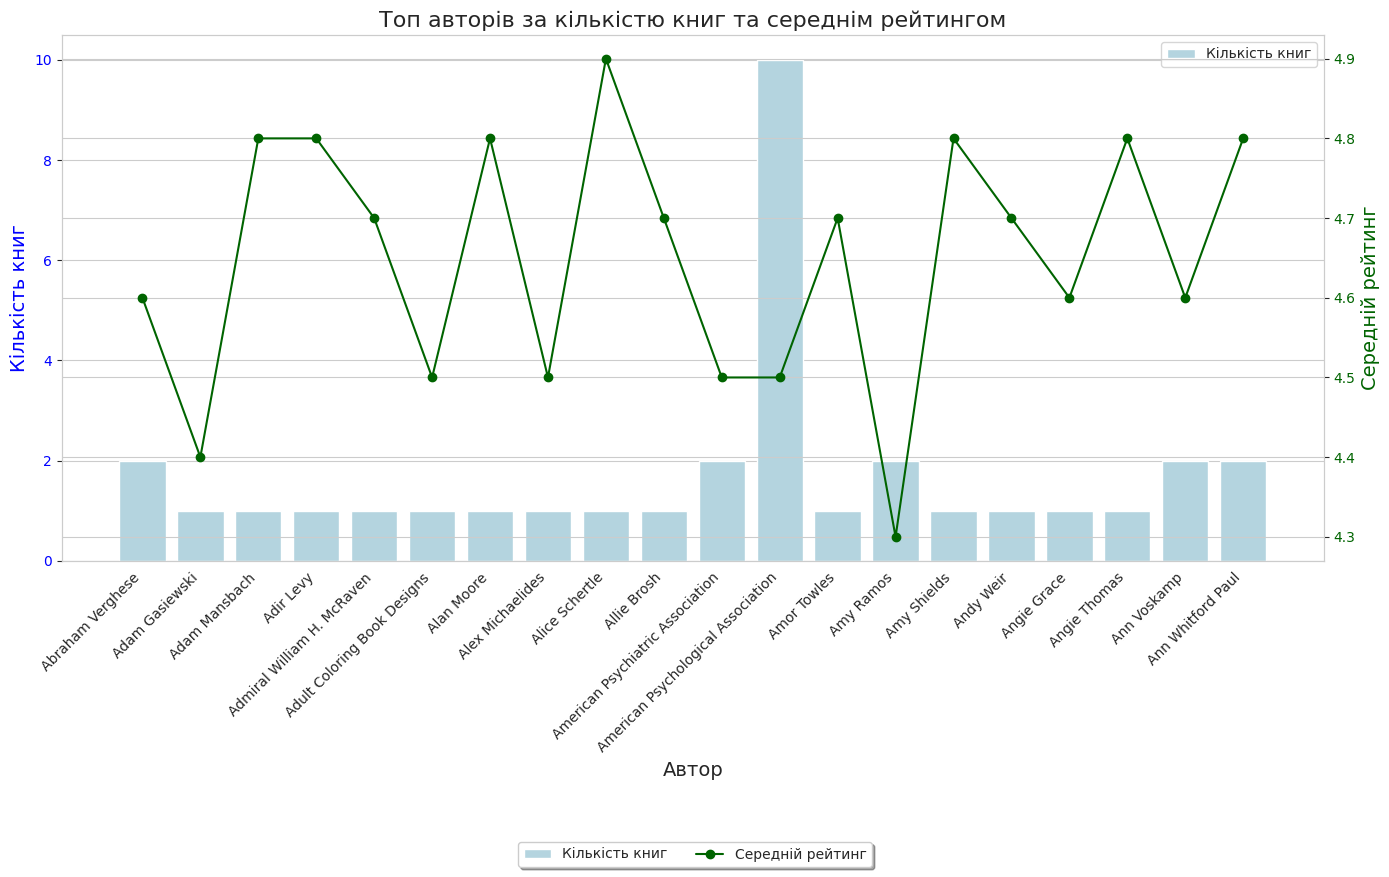

In [23]:
sns.set_style('whitegrid')

fig, ax1 = plt.subplots(figsize=(14, 8))

top_n = 20
top_authors = combined_df.head(top_n)

x = range(len(top_authors))

sns.barplot(x=x, y=top_authors['name'], ax=ax1, color='lightblue', label='Кількість книг')

ax1.set_ylabel('Кількість книг', color='blue', fontsize=14)
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xlabel('Автор', fontsize=14)
ax1.set_xticks(x)
ax1.set_xticklabels(top_authors['author'], rotation=45, ha='right')

ax2 = ax1.twinx()

ax2.plot(x, top_authors['user_rating'], color='darkgreen', label='Середній рейтинг', marker='o')

ax2.set_ylabel('Середній рейтинг', color='darkgreen', fontsize=14)
ax2.tick_params(axis='y', labelcolor='darkgreen')

plt.title('Топ авторів за кількістю книг та середнім рейтингом', fontsize=16)
fig.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), shadow=True, ncol=2)

plt.tight_layout()
plt.show()

In [24]:
authors_avg_rating = df.groupby('author')['user_rating'].mean()

min_avg_rating = authors_avg_rating.min()

author_with_min_avg_rating = authors_avg_rating[authors_avg_rating == min_avg_rating]
author_with_min_avg_rating


author
Donna Tartt    3.9
Name: user_rating, dtype: float64

# Який автор перший у списку?
# Відповідь: 
## 171	Muriel Barbery	1	4.000000
## 120	Jeff Kinney	    12	4.800000

In [25]:
sorted_combined_df = combined_df.sort_values(by=['name', 'user_rating'])
sorted_combined_df

,author,name,user_rating
171,Muriel Barbery,1,4.000000
43,Chris Cleave,1,4.100000
109,Ian K. Smith M.D.,1,4.100000
186,Pierre Dukan,1,4.100000
81,Elizabeth Strout,1,4.200000
...,...,...,...
11,American Psychological Association,10,4.500000
226,Suzanne Collins,11,4.663636
92,Gary Chapman,11,4.736364
197,Rick Riordan,11,4.772727
